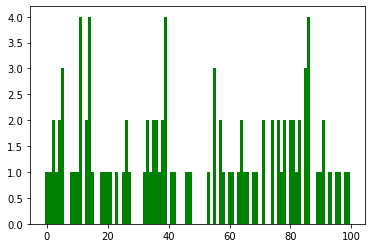

In [12]:
from random import * 
import matplotlib.pyplot as plt
#Birthday paradox (unrelated to the coding assignment ig)
def create_Birthday_Plot(n):
    #n bins
    bins = [0]*n
    for i in range(0,n):
        #select bin to throw ball into
        r = int(random()*(n))
        #throw ball
        bins[r] += 1
    keys = [i for i in range(0,n)]
    values = []
    for i in range(0,n):
        values.append(bins[i])
    width = 1.0
    plt.bar(keys, values, width, color='g')
    plt.show()



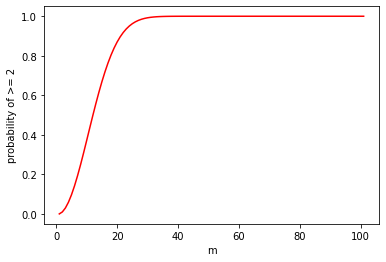

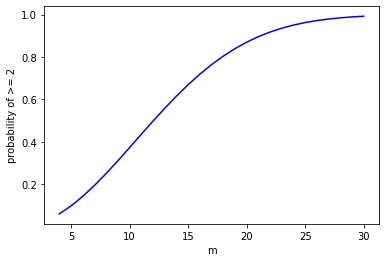

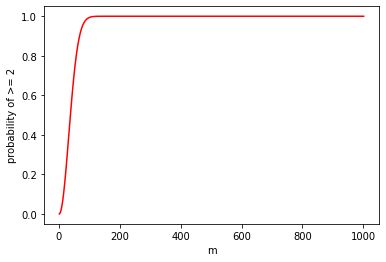

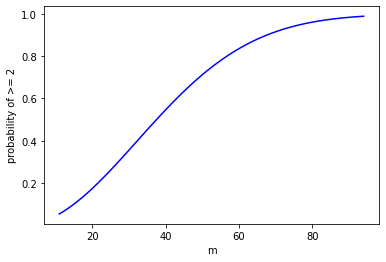

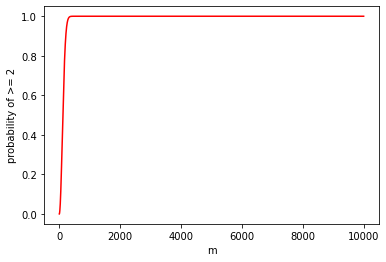

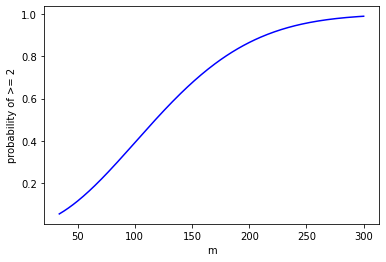

KeyboardInterrupt: 

In [28]:
#4a -- probability of collision as a function of n & m
def visualize_Birthday(n):
    xaxis = [m for m in range(1, n+2)]
    yaxis = []
    #m = [1, n+1]
    
    for m in range(1, n+2):
        negatedpr = 1
        # for t = 1 to m - (t-1/n)
        for t in range(1, m+1):
            negatedpr *= (1 - ((t-1)/n))
        pr = 1 - negatedpr
        yaxis.append(pr)
    
    #standard plot
    plt.plot(xaxis,yaxis, color="r")
    plt.xlabel("m")
    plt.ylabel("probability of >= 2")
    plt.show()
    
    #zoomed in region 
    #m = 1/3 sqrtn to m = 3sqrtn
    zoomxaxis = xaxis[int((1/3)*n**.5): int(3*n**.5)]
    zoomyaxis = yaxis[int((1/3)*n**.5): int(3*n**.5)]
    plt.plot(zoomxaxis,zoomyaxis,color="b")
    plt.xlabel("m")
    plt.ylabel("probability of >= 2")
    plt.show()

#main 
num = [100, 1000, 10000, 100000, 1000000]
for n in num:
    visualize_Birthday(n)

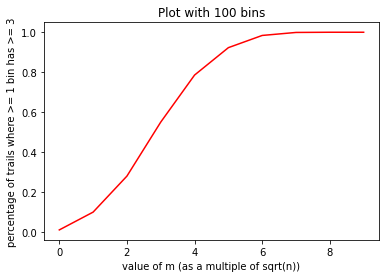

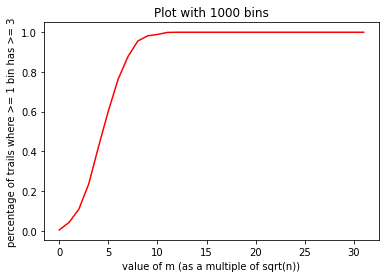

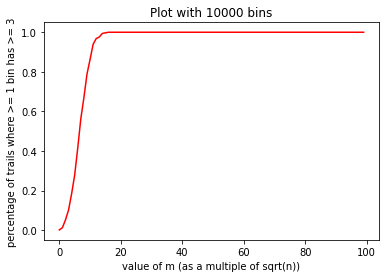

In [24]:
#4b - part a
from random import * 
import matplotlib.pyplot as plt

def ballsandbins(n, m, condition):
    #n bins
    bins = [0]*n
    #throw m balls
    for i in range(0,m):
        #select bin to throw ball into
        r = int(random()*(n))
        #throw ball
        bins[r] += 1
    if condition(bins):
        return 1
    else:
        return 0 
#the event we are interested in (i.e. one bin has >= 3 balls)
def condition(bins):
    for b in bins:
        if b >= 3:
            return True
    return False

#parameters 
# T: number of trials 
# n: number of bins in each trial
# m: number of balls thrown in each trial 
def findProbability(T,n,m):
    occurence = 0
    for i in range(0,T):
        occurence += ballsandbins(n,m, condition)
    return occurence/T

def visualizeProbability():
    T = 1000
    ns = [100, 1000, 10000]
    
    for n in ns:
        index = 0
        prarray = []
        marray = []
        m = int(n**(.5))
        while m <= n: 
            pr = findProbability(T, n, m)
            prarray.append(pr)
            marray.append(index)
            m += int(n**(.5))
            index += 1
        plt.plot(marray, prarray, color="r")
        plt.title("Plot with %d bins" % n)
        plt.xlabel("value of m (as a multiple of sqrt(n))")
        plt.ylabel("percentage of trails where >= 1 bin has >= 3")
        plt.show()
visualizeProbability()

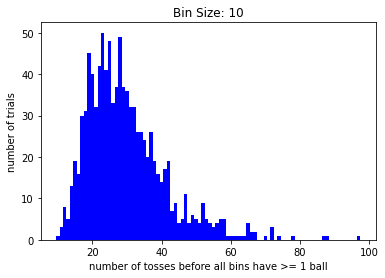

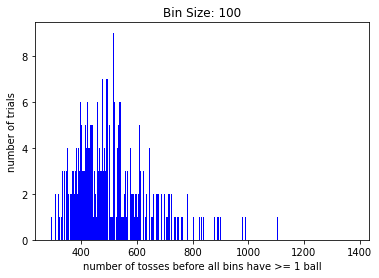

In [56]:
#4b part b 

#coupon collector
#parameters
# n: the number of bins
# condition: a numerical value specifying how many balls we care about in a bin 
def couponcollector(n, condition):
    binssatisfied = 0
    #n bins
    bins = [0]*n
    m = 0 
    #keep throwing while there does not exist a bin with a collision
    while(True):
        #increment m
        m+=1 
        #select bin to throw ball into
        r = int(random()*(n))
        #throw ball
        bins[r] += 1
        #the event of interest here is if this particular bin has > 1 ball. If it does, we return. Because we check every ball 
        # this is gauranteed to be the earliest this event occurs.
        if bins[r]-1 < condition and bins[r] >= condition:
            binssatisfied += 1
        if binssatisfied == n:
            return m
    
def visualizecouponcollector():
    T = 1000
    ns = [10, 100]
    for n in ns:
        mhist = {}
        t = 0 
        while t < 1000:
            m = couponcollector(n, 1)
            if (mhist.get(m) == None):
                mhist[m] = 1
            else:
                mhist[m] = mhist.get(m) + 1
            t+= 1
        keys = list(mhist.keys())
        values = list(mhist.values())
        plt.bar(keys, values, width = 1.0, color='b')
        plt.title("Bin Size: %d" %n)
        plt.xlabel("number of tosses before all bins have >= 1 ball")
        plt.ylabel("number of trials")
        plt.show()
visualizecouponcollector()

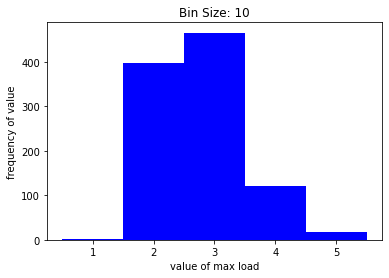

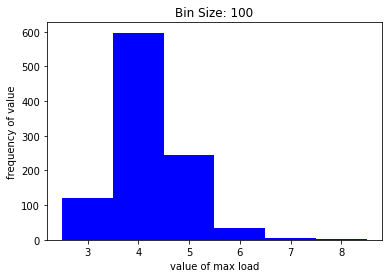

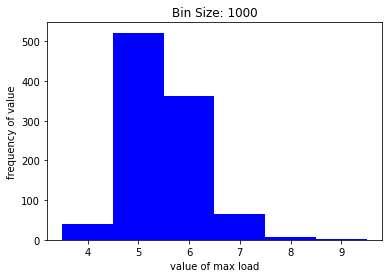

In [63]:
#4b part c

#load vector stuff
def findLoad(n):
    m = n
    #n bins
    bins = [0]*n
    #throw m balls
    for i in range(0,m):
        #select bin to throw ball into
        r = int(random()*(n))
        #throw ball
        bins[r] += 1
    return sorted(bins, reverse=True)

def visualizeLoads():
    ns = [10, 100, 1000]
    T = 1000
    for n in ns:
        loadhist = {}
        for t in range(0, 1000):
            maxload = findLoad(n)[0]
            if(loadhist.get(maxload) == None):
                loadhist[maxload] = 1
            else:
                loadhist[maxload] = loadhist.get(maxload) + 1
        keys = list(loadhist.keys())
        values = list(loadhist.values())
        plt.bar(keys, values, width = 1.0, color='b')
        plt.title("Bin Size: %d" %n)
        plt.xlabel("value of max load")
        plt.ylabel("frequency of value")
        plt.show()

visualizeLoads()